In [10]:
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from preamble import *
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
cancer = load_breast_cancer()
print(cancer.DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [3]:
print(cancer.feature_names)
print(cancer.target_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


In [4]:
type(cancer.data)

numpy.ndarray

In [5]:
cancer.data.shape

(569, 30)

In [6]:
import pandas as pd
raw_data = pd.read_csv('breast-cancer-wisconsin-data.csv', delimiter=',')
raw_data.tail(10)

,id,diagnosis,radius_mean,texture_mean,...,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
559,925291,B,11.51,23.93,...,0.10,0.21,0.09,NaN
560,925292,B,14.05,27.15,...,0.10,0.23,0.08,NaN
561,925311,B,11.20,29.37,...,0.00,0.16,0.06,NaN
562,925622,M,15.22,30.62,...,0.24,0.41,0.14,NaN
563,926125,M,20.92,25.09,...,0.25,0.29,0.10,NaN
564,926424,M,21.56,22.39,...,0.22,0.21,0.07,NaN
565,926682,M,20.13,28.25,...,0.16,0.26,0.07,NaN
566,926954,M,16.60,28.08,...,0.14,0.22,0.08,NaN
567,927241,M,20.60,29.33,...,0.27,0.41,0.12,NaN
568,92751,B,7.76,24.54,...,0.00,0.29,0.07,NaN


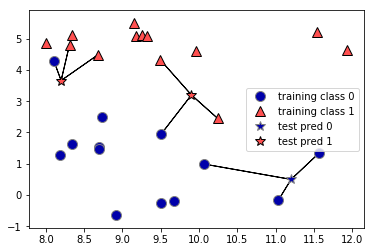

In [7]:
#KNN Classifier Overview

mglearn.plots.plot_knn_classification(n_neighbors=3)

In [14]:
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from preamble import *
import matplotlib.pyplot as plt

%matplotlib inline

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state = 42)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [23]:
print('Acuracy of KNN n-5 on the training set: {:3f}'.format(knn.score(X_train, y_train)))
print('Acuracy of KNN n-5 on the test set: {:.3f}'.format(knn.score(X_test, y_test)))

Acuracy of KNN n-5 on the training set: 0.946009
Acuracy of KNN n-5 on the test set: 0.930


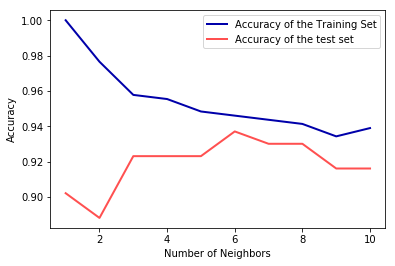

In [28]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state =66)

training_accuracy =[]
test_accuracy = []

neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label='Accuracy of the Training Set')    
plt.plot(neighbors_settings, test_accuracy, label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.legend()
    
    